In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(style="darkgrid")
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from scipy import stats

In [ ]:
df = pd.read_csv('/content/heart.csv')

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
duplicate = df[df.duplicated()]
duplicate

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
15,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1
31,50,0,1,120,244,0,1,162,0,1.1,2,0,2,1
43,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
55,55,1,0,140,217,0,1,111,1,5.6,0,0,3,0
61,66,0,2,146,278,0,0,152,0,0.0,1,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [ ]:
    df.drop_duplicates(inplace=True)

In [ ]:


df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [ ]:
def find_outliers_IQR(data_column):
    q1 = data_column.quantile(0.25)
    q3 = data_column.quantile(0.75)
    IQR = q3 - q1

    outliers = data_column[(data_column < (q1 - 1.5 * IQR)) | (data_column > (q3 + 1.5 * IQR))]
    return outliers


columns_to_check = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

for col in columns_to_check:
    outliers = find_outliers_IQR(df[col])
    print(f"\n--- {col.upper()} ---")
    print("Number of outliers: " + str(len(outliers)))
    print("Max outlier value: " + str(outliers.max()))
    print("Min outlier value: " + str(outliers.min()))


--- AGE ---
Number of outliers: 0
Max outlier value: nan
Min outlier value: nan

--- TRESTBPS ---
Number of outliers: 9
Max outlier value: 200
Min outlier value: 172

--- CHOL ---
Number of outliers: 5
Max outlier value: 564
Min outlier value: 394

--- THALACH ---
Number of outliers: 1
Max outlier value: 71
Min outlier value: 71

--- OLDPEAK ---
Number of outliers: 5
Max outlier value: 6.2
Min outlier value: 4.2


In [ ]:
def cap_outliers_IQR(data_column):
    q1 = data_column.quantile(0.25)
    q3 = data_column.quantile(0.75)
    IQR = q3 - q1

    lower_bound = q1 - 1.5 * IQR
    upper_bound = q3 + 1.5 * IQR

    # Cap outliers to the bounds
    capped_column = data_column.copy()
    capped_column[capped_column < lower_bound] = lower_bound
    capped_column[capped_column > upper_bound] = upper_bound

    return capped_column


columns_to_cap = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

for col in columns_to_cap:
    df[col] = cap_outliers_IQR(df[col])
    print(f"Capped outliers in: {col}")

Capped outliers in: age
Capped outliers in: trestbps
Capped outliers in: chol
Capped outliers in: thalach
Capped outliers in: oldpeak


<ipython-input-14-6858e75fea9e>:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '370.375' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  capped_column[capped_column > upper_bound] = upper_bound
<ipython-input-14-6858e75fea9e>:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '84.125' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  capped_column[capped_column < lower_bound] = lower_bound


In [ ]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.094962,-0.063107,0.290209,0.198901,0.119492,-0.111590,-0.394960,0.093216,0.209143,-0.164124,0.302261,0.065317,-0.221476
sex,-0.094962,1.000000,-0.051740,-0.048559,-0.178446,0.046022,-0.060351,-0.045414,0.143460,0.107575,-0.032990,0.113060,0.211452,-0.283609
cp,-0.063107,-0.051740,1.000000,0.055026,-0.089633,0.096018,0.041561,0.293351,-0.392937,-0.142327,0.116854,-0.195356,-0.160370,0.432080
trestbps,0.290209,-0.048559,0.055026,1.000000,0.135429,0.169049,-0.117933,-0.055130,0.056350,0.182151,-0.115248,0.100350,0.051065,-0.140083
chol,0.198901,-0.178446,-0.089633,0.135429,1.000000,0.013221,-0.137117,-0.014519,0.080653,0.053210,0.010459,0.095374,0.086998,-0.099932
fbs,0.119492,0.046022,0.096018,0.169049,0.013221,1.000000,-0.083081,-0.008013,0.024729,0.010471,-0.058654,0.144935,-0.032752,-0.026826
restecg,-0.111590,-0.060351,0.041561,-0.117933,-0.137117,-0.083081,1.000000,0.043183,-0.068807,-0.059850,0.090402,-0.083112,-0.010473,0.134874
thalach,-0.394960,-0.045414,0.293351,-0.055130,-0.014519,-0.008013,0.043183,1.000000,-0.381027,-0.349367,0.385844,-0.231057,-0.096466,0.420408
exang,0.093216,0.143460,-0.392937,0.056350,0.080653,0.024729,-0.068807,-0.381027,1.000000,0.298094,-0.256106,0.125377,0.205826,-0.435601
oldpeak,0.209143,0.107575,-0.142327,0.182151,0.053210,0.010471,-0.059850,-0.349367,0.298094,1.000000,-0.572578,0.232297,0.207221,-0.435099


<Axes: >

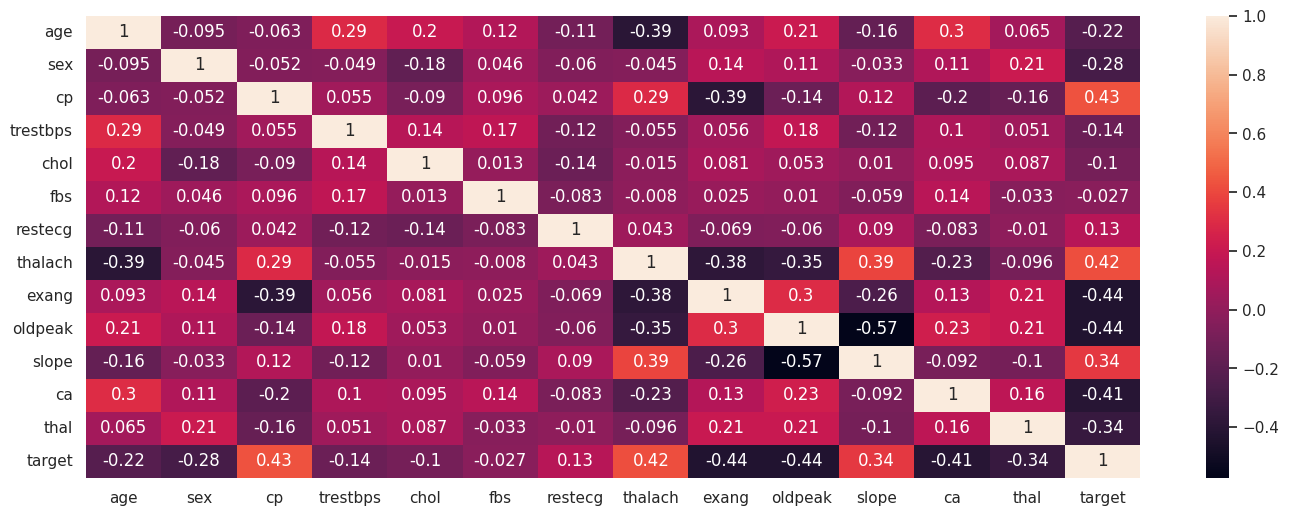

In [ ]:
plt.figure(figsize=(17,6))
sns.heatmap(df.corr(),annot=True)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df.drop('target', axis=1)
y = df['target']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# **Neural Network**

In [ ]:
import tensorflow as tf
import keras
from keras.layers import Dense, Dropout, Input
from keras.models import Sequential

In [ ]:
model = Sequential()

model.add(Dense(64, input_dim=13, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 64)             │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 961 (3.75 KB)

 Trainable params: 961 (3.75 KB)

 Non-trainable params: 0 (0.00 B)

**Explanation**: I have used Sigmoid in output layer as it is good for binary classifications.As there is 13 feautures the parameter input is dim=13.I have used ReLU for hidden layers.

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=2)

Epoch 1/50
8/8 - 1s - 162ms/step - accuracy: 0.4398 - loss: 39.9617
Epoch 2/50
8/8 - 0s - 7ms/step - accuracy: 0.4398 - loss: 21.6998
Epoch 3/50
8/8 - 0s - 6ms/step - accuracy: 0.5021 - loss: 4.8477
Epoch 4/50
8/8 - 0s - 7ms/step - accuracy: 0.5602 - loss: 5.1562
Epoch 5/50
8/8 - 0s - 5ms/step - accuracy: 0.5726 - loss: 2.2277
Epoch 6/50
8/8 - 0s - 6ms/step - accuracy: 0.5851 - loss: 1.9066
Epoch 7/50
8/8 - 0s - 8ms/step - accuracy: 0.6307 - loss: 1.2044
Epoch 8/50
8/8 - 0s - 7ms/step - accuracy: 0.6307 - loss: 0.8773
Epoch 9/50
8/8 - 0s - 6ms/step - accuracy: 0.6722 - loss: 0.7648
Epoch 10/50
8/8 - 0s - 7ms/step - accuracy: 0.6888 - loss: 0.6545
Epoch 11/50
8/8 - 0s - 6ms/step - accuracy: 0.7054 - loss: 0.6037
Epoch 12/50
8/8 - 0s - 7ms/step - accuracy: 0.6722 - loss: 0.5706
Epoch 13/50
8/8 - 0s - 7ms/step - accuracy: 0.7676 - loss: 0.5093
Epoch 14/50
8/8 - 0s - 8ms/step - accuracy: 0.7759 - loss: 0.5081
Epoch 15/50
8/8 - 0s - 7ms/step - accuracy: 0.7884 - loss: 0.4864
Epoch 16/50
8/8

**Explanation**: Here in this dataset, the model is compiled using binary_crossentropy as the loss function, which is appropiate for the dataset ( Binary classification). The loss function indicates how well the model's predictions align with the actual labels. I have used Adam optimizer, used accuracy to track the performance. There are 50 epochs.

In [ ]:
predict = model.predict(X_test)
#since we have use sigmoid activation function in output layer
predict = (predict > 0.5).astype(int).ravel()
print(predict)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
[1 0 0 1 1 0 0 1 0 0 1 0 1 1 1 0 0 1 0 1 1 0 0 1 0 0 1 1 0 0 1 1 1 1 1 1 0
 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 1]


In [ ]:
from sklearn import metrics
Y_pred_train = (model.predict(X_train) > 0.5).astype(int).ravel()

print(" Model Evaluation on Training Set")
print('Precision : ', np.round(metrics.precision_score(y_train, Y_pred_train) * 100, 2))
print('Accuracy  : ', np.round(metrics.accuracy_score(y_train, Y_pred_train) * 100, 2))
print('Recall    : ', np.round(metrics.recall_score(y_train, Y_pred_train) * 100, 2))
print('F1 Score  : ', np.round(metrics.f1_score(y_train, Y_pred_train) * 100, 2))
print('AUC       : ', np.round(metrics.roc_auc_score(y_train, Y_pred_train) * 100, 2))

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
 Model Evaluation on Training Set
Precision :  87.7
Accuracy  :  82.16
Recall    :  79.26
F1 Score  :  83.27
AUC       :  82.55


**Explanation**: High precision, accuracy, and F1-score indicated that the model performs well  to distinguish between classes.